In [50]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
FONTSIZE = 15

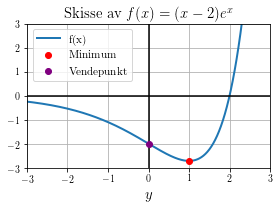

In [40]:
# Oppgave 7d

x = np.linspace(-4, 4, num = 500)
y = (x - 2)*np.exp(x)


plt.figure(figsize = (4, 3))
plt.title('Skisse av $f(x) = (x-2)e^x$', fontsize = FONTSIZE)
plt.plot(x,y, linewidth = 2, label = 'f(x)')
plt.plot([-99, 99], [0, 0], 'k')
plt.plot([0, 0], [-99, 99], 'k')
plt.grid(True)
plt.xlabel('$x$', fontsize = FONTSIZE)
plt.xlabel('$y$', fontsize = FONTSIZE)
plt.scatter([1], [-np.exp(1)], label = 'Minimum', color = 'red', zorder = 8)
plt.scatter([0], [-2], label = 'Vendepunkt', color = 'purple', zorder = 8)


plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best', fontsize = FONTSIZE * 0.75)
plt.tight_layout()
plt.savefig('oppg_7d.pdf')
plt.show()

In [83]:
def convolve_once(outcomes, probs):
    """
    Convolves outcomes and associated probabilities, keeps track of indexes too."""

    new_outcomes = defaultdict(int)

    for outcome1, prob1 in zip(outcomes, probs):
        for outcome2, prob2 in zip(outcomes, probs):
            #print(outcome1, outcome2, outcome1 + outcome2 , prob1, prob2)
            new_outcomes[outcome1 + outcome2] += prob1 * prob2

    
    #print(new_outcomes)
            
    outcomes = [i for (i, j) in list(sorted(new_outcomes.items()))]
    probs = [j for (i, j) in list(sorted(new_outcomes.items()))]

    assert abs(sum(probs) - 1) < 0.01
    
    return outcomes, probs

def convolve_n(outcomes, probs, n):
    for i in range(n):
        outcomes, probs = convolve_once(outcomes, probs)
        
    return outcomes, probs
    
outcomes = [0, 40, -10]
probs = [0.5, 0.1, 0.4]
outcomes, probs = convolve_n(outcomes, probs, 1)
print(outcomes)
print(probs, sum(probs))

[-20, -10, 0, 30, 40, 80]
[0.16000000000000003, 0.4, 0.25, 0.08000000000000002, 0.1, 0.010000000000000002] 1.0


160 True
640 True


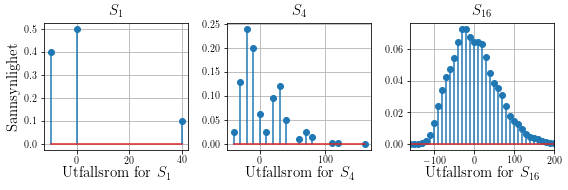

In [128]:
# Oppgave 8b


outcomes = [0, 40, -10]
probs = [0.5, 0.1, 0.4]

# Data for first plot
x = np.array(outcomes)
p = np.array(probs)

# Convolve 2 times, sum of 3
outcomes, probs = convolve_n(outcomes, probs, 2)
x2 = np.array(outcomes)
p2 = np.array(probs)


# Convolve 5 times, sum of 6
outcomes, probs = convolve_n(outcomes, probs, 2)
x3 = np.array(outcomes)
p3 = np.array(probs)

plt.figure(figsize = (8, 2.75))
plt.subplot(1, 3, 1)
plt.title('$S_1$', fontsize = FONTSIZE)
plt.stem(x, p)
plt.grid(True, zorder = -15)
plt.ylabel('Sannsynlighet', fontsize = FONTSIZE)
plt.xlabel('Utfallsrom for $S_1$', fontsize = FONTSIZE)
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.title('$S_4$', fontsize = FONTSIZE)
plt.stem(x2, p2)
#plt.xlim([-100, 100])
plt.grid(True, zorder = -15)
plt.xlabel('Utfallsrom for $S_4$', fontsize = FONTSIZE)
print(max(x2), max(x2) == 40 * 4)
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.title('$S_{16}$', fontsize = FONTSIZE)
plt.stem(x3, p3)
plt.xlim([-10*16, 200])
plt.grid(True, zorder = -15)
plt.xlabel('Utfallsrom for $S_{16}$', fontsize = FONTSIZE)
print(max(x3), max(x3) == 40 * 16)

plt.tight_layout()
plt.savefig('oppg_8b.pdf')
plt.show()
